In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import math


In [2]:
df=pd.read_csv('data.csv').round(2)
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16528\90482881.py:1: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv').round(2)


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.24963568593,49,0,Self_Employed,Tier_1,13391.174890705777,0.0,2206.490129258186,6658.768340572072,2636.9706962044347,...,6200.537192442157,11265.627706851701,1685.6962218203441,328.895281163744,465.7691723793779,195.15131970442437,678.292858894135,67.68247059153573,0.0,85.7355167261814
1,26858.596591729543,34,2,Retired,Tier_2,5371.719318345909,0.0,869.522616973343,2818.444460208314,1543.018777757239,...,1923.1764339045449,9676.818732684449,540.3065609743139,119.3471392729626,141.8660892207998,234.13116770757009,286.6684081170868,6.603211579465993,56.30687375031202,97.38860573311446
2,50367.60508357677,35,1,Student,Tier_3,7555.140762536515,4612.1033864940755,2201.80004994864,6313.222080930132,3221.396403447025,...,7050.360421687626,13891.450624290315,1466.0739836139662,473.54975177871074,410.85712937681257,459.9652564827151,488.38342327494263,7.290892451943464,106.65359736162743,138.54242192398323
3,101455.6002469913,21,0,Self_Employed,Tier_3,15218.340037048692,6809.441426747919,4889.418087072337,14690.149362877528,7106.13000500776,...,16694.965136405768,31617.953614661077,1875.9327700858253,762.0207885828804,1241.0174478115837,320.1905938249095,1389.8150326091811,193.5027543462559,0.0,296.0411827445534
4,24875.28354773196,52,4,Professional,Tier_2,4975.056709546392,3112.6093984226027,635.90717006727,3034.3296645448127,1276.1551627316926,...,1874.0994338344515,6265.700532103096,788.9531239694041,68.16076563734855,61.71250516811943,187.17375009486523,194.11712989682542,47.29459127462688,67.38812048153109,96.5570761532972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,90295.7726380059,21.0,1.0,Student,Tier_2,18059.154528,0.0,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.17517,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
39999,40604.56737267629,30.0,1.0,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.5111,379.927216,138.209465,297.695658,824.565267,57.891,72.728663,122.569277
40000,118157.81723999511,27.0,2.0,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.96178,92.189012,569.811212
40001,8209.249768742677,62.0,3.0,Professional,Tier_1,2462.774931,1120.881704,276.376556,969.916908,460.435438,...,531.044006,860.350559,261.160294,124.057428,25.940556,35.238134,94.909265,1.685026,4.837574,12.766302


In [3]:
df.isnull().sum()

Income                             0
Age                                2
Dependents                         2
Occupation                         2
City_Tier                          2
Rent                               2
Loan_Repayment                     2
Insurance                          2
Groceries                          2
Transport                          2
Eating_Out                         2
Entertainment                      2
Utilities                          2
Healthcare                         2
Education                          2
Miscellaneous                      2
Desired_Savings_Percentage         2
Desired_Savings                    2
Disposable_Income                  2
Potential_Savings_Groceries        2
Potential_Savings_Transport        2
Potential_Savings_Eating_Out       2
Potential_Savings_Entertainment    2
Potential_Savings_Utilities        2
Potential_Savings_Healthcare       2
Potential_Savings_Education        2
Potential_Savings_Miscellaneous    2
d

In [4]:
df.describe(include='all').T

,count,unique,top,freq
Income,40003,20003,44637.24963568593,2
Age,40001,95,47,805
Dependents,40001,11,0,6641
Occupation,40001,5,Retired,10038
City_Tier,40001,4,Tier_2,20136
Rent,40001,27235,13391.174890705777,2
Loan_Repayment,40001,10853,0.0,19709
Insurance,40001,27235,2206.490129258186,2
Groceries,40001,27235,6658.768340572072,2
Transport,40001,27235,2636.9706962044347,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40003 entries, 0 to 40002
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Income                           40003 non-null  object
 1   Age                              40001 non-null  object
 2   Dependents                       40001 non-null  object
 3   Occupation                       40001 non-null  object
 4   City_Tier                        40001 non-null  object
 5   Rent                             40001 non-null  object
 6   Loan_Repayment                   40001 non-null  object
 7   Insurance                        40001 non-null  object
 8   Groceries                        40001 non-null  object
 9   Transport                        40001 non-null  object
 10  Eating_Out                       40001 non-null  object
 11  Entertainment                    40001 non-null  object
 12  Utilities                       

In [6]:
df.sample(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
19904,45859.813948939074,36,2,Self_Employed,Tier_2,9171.962789787814,5721.066429729171,1550.4226981824436,6319.783571471496,3539.791572369454,...,4749.262572193859,7468.24293216841,665.201804672213,249.2969702262571,160.1316653300316,165.8775846279161,692.2774054183116,105.70502407246374,54.08240552885076,118.4826372314326
31932,20242.49467539448,41,4,Student,Tier_2,4048.498935078896,0.0,977.4706013076154,2760.3836883372333,1563.9898733466111,...,1828.6774030043057,5128.920715818182,529.963367292362,419.9573318421656,165.08898375130696,105.90069468877141,308.35882567466524,1.819076667337584,30.996625105010406,125.28026931889237
33548,12607.856431108276,55.0,1.0,Professional,Tier_2,2521.571286,1719.658296,629.025931,1652.779073,824.843037,...,636.111204,2175.757751,161.004418,208.01481,79.128248,42.462566,186.16509,15.752856,35.417848,41.025115
17085,49639.08757640592,36,2,Student,Tier_2,9927.817515281184,0.0,993.9362675241925,6104.645905285441,3301.731857141367,...,5716.623729094852,17814.31436703113,818.4729229337175,649.6939976266179,434.95837180676494,312.865876280999,155.47670556921165,49.76913588941959,80.21559696004151,175.99966778213704
6549,47780.74806230188,21,4,Student,Tier_2,9556.149612460376,5464.650299257464,1179.840723545511,7089.147724579143,3689.345893993012,...,5825.510752459261,6487.672794234124,1128.1899168430436,347.08035480638466,320.66832857497593,336.18382703297254,560.1704035535187,12.192346700145528,12.183992410916584,80.0094782838374
29551,5803.192184202944,19,3,Retired,Tier_1,1740.9576552608833,0.0,253.3397551790661,765.911275103735,449.8307311251214,...,455.0975309456388,1066.7566827277924,96.60718338095555,45.323391031062194,33.52381748676745,45.876178791132695,27.47985002689274,5.797567362415526,7.096587497929862,16.192950948392248
18560,18646.648461824367,46,0,Student,Tier_2,3729.3296923648736,2897.830824499847,869.0688249785351,2290.1851796327674,1117.543881745065,...,1294.7285707585804,4671.594328428375,224.50992550153344,144.7787124132096,37.50899157030398,148.6270016859369,145.07893319428806,26.310042513131602,0.0,27.475756458881285
1345,9145.655949191967,19,4,Professional,Tier_3,1371.848392378795,1127.529923698787,219.0556935507741,939.7767909020084,538.1268936369463,...,592.1787542460283,2491.705712823451,172.02409107568525,49.7308012146804,12.069443409644427,43.86333387976879,101.91051531622279,7.236851675589605,18.173175473980848,67.3258081850712
38614,33546.84948329151,61.0,1.0,Student,Tier_1,10064.054845,0.0,861.359904,3962.746327,2444.383723,...,2754.816511,8952.461132,263.045231,347.280015,83.316776,78.003401,265.372527,5.866623,63.640081,40.292248
2098,8655.460287052867,56,4,Self_Employed,Tier_3,1298.31904305793,0.0,424.94628699913414,954.9500352498842,468.883475402341,...,480.37705918566917,3449.569475606544,107.75624455225909,110.336653564132,95.49412569965651,72.02713965095664,25.859167256028282,1.4339991452350929,8.261912197209138,19.530377112611223


In [7]:
df['Occupation'].value_counts()

Occupation
Retired          10038
Professional     10022
Student          10006
Self_Employed     9934
Occupation           1
Name: count, dtype: int64

In [8]:
df = df.round(2)
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.24963568593,49,0,Self_Employed,Tier_1,13391.174890705777,0.0,2206.490129258186,6658.768340572072,2636.9706962044347,...,6200.537192442157,11265.627706851701,1685.6962218203441,328.895281163744,465.7691723793779,195.15131970442437,678.292858894135,67.68247059153573,0.0,85.7355167261814
1,26858.596591729543,34,2,Retired,Tier_2,5371.719318345909,0.0,869.522616973343,2818.444460208314,1543.018777757239,...,1923.1764339045449,9676.818732684449,540.3065609743139,119.3471392729626,141.8660892207998,234.13116770757009,286.6684081170868,6.603211579465993,56.30687375031202,97.38860573311446
2,50367.60508357677,35,1,Student,Tier_3,7555.140762536515,4612.1033864940755,2201.80004994864,6313.222080930132,3221.396403447025,...,7050.360421687626,13891.450624290315,1466.0739836139662,473.54975177871074,410.85712937681257,459.9652564827151,488.38342327494263,7.290892451943464,106.65359736162743,138.54242192398323
3,101455.6002469913,21,0,Self_Employed,Tier_3,15218.340037048692,6809.441426747919,4889.418087072337,14690.149362877528,7106.13000500776,...,16694.965136405768,31617.953614661077,1875.9327700858253,762.0207885828804,1241.0174478115837,320.1905938249095,1389.8150326091811,193.5027543462559,0.0,296.0411827445534
4,24875.28354773196,52,4,Professional,Tier_2,4975.056709546392,3112.6093984226027,635.90717006727,3034.3296645448127,1276.1551627316926,...,1874.0994338344515,6265.700532103096,788.9531239694041,68.16076563734855,61.71250516811943,187.17375009486523,194.11712989682542,47.29459127462688,67.38812048153109,96.5570761532972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,90295.7726380059,21.0,1.0,Student,Tier_2,18059.154528,0.0,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.17517,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
39999,40604.56737267629,30.0,1.0,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.5111,379.927216,138.209465,297.695658,824.565267,57.891,72.728663,122.569277
40000,118157.81723999511,27.0,2.0,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.96178,92.189012,569.811212
40001,8209.249768742677,62.0,3.0,Professional,Tier_1,2462.774931,1120.881704,276.376556,969.916908,460.435438,...,531.044006,860.350559,261.160294,124.057428,25.940556,35.238134,94.909265,1.685026,4.837574,12.766302


<Axes: >

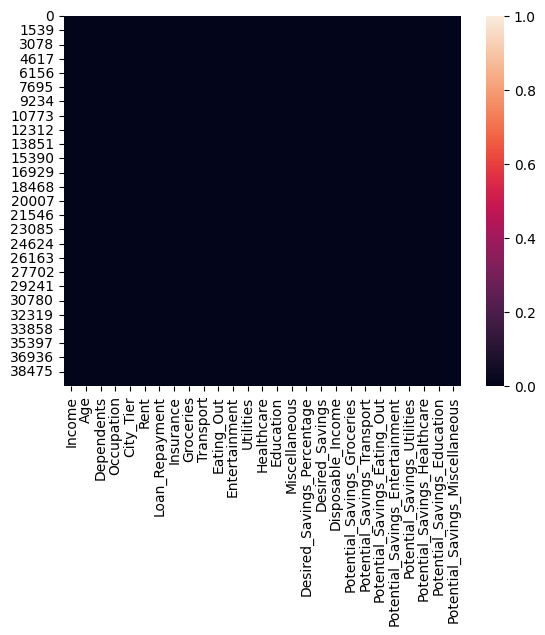

In [9]:
sns.heatmap(df.isnull())

## Detección de Outliers

In [10]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplots para todas las columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.show()

## EDA

In [ ]:
numeric_cols=df.select_dtypes(include=['float64', 'int64']).columns
# Crear un bucle para mostrar la distribución de las columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(df[col]), bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
plt.show()



## Matriz de Correlacion

In [12]:
# Calcular la matriz de correlación
corr = df[numeric_cols].corr()

# Generar una máscara para la parte superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Dibujar el mapa de calor con la máscara
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

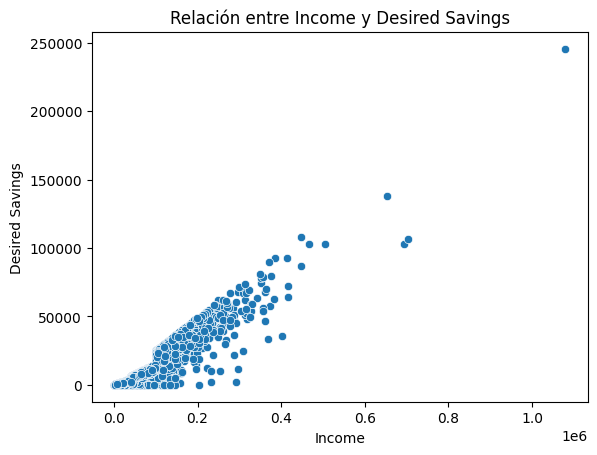

In [13]:
# Gráfico de dispersión
sns.scatterplot(data=df, x='Income', y='Desired_Savings')
plt.title('Relación entre Income y Desired Savings')
plt.xlabel('Income')
plt.ylabel('Desired Savings')
plt.show()


In [14]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [15]:
df['Total_Expenses'] = df[['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']].sum(axis=1)
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,11265.63,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74,33371.61
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,9676.82,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39,17181.77
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,13891.45,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54,36476.16
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,31617.95,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04,69837.65
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,6265.70,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56,18609.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.47,51,4,Self_Employed,Tier_1,12274.04,7703.85,1646.80,5477.40,2084.23,...,1163.32,597.03,287.32,347.66,145.84,212.83,44.90,98.77,190.59,39750.14
19996,90295.77,21,1,Student,Tier_2,18059.15,0.00,2770.59,13118.22,4633.11,...,30725.18,3854.82,359.60,911.27,424.06,1555.55,129.66,239.45,351.44,59570.59
19997,40604.57,30,1,Professional,Tier_2,8120.91,8089.61,1548.56,6018.28,2493.56,...,2267.91,1385.51,379.93,138.21,297.70,824.57,57.89,72.73,122.57,38336.66
19998,118157.82,27,2,Professional,Tier_1,35447.35,12345.91,4735.67,16392.44,8248.24,...,10603.68,3217.77,2265.87,726.25,273.91,859.23,98.96,92.19,569.81,107554.13


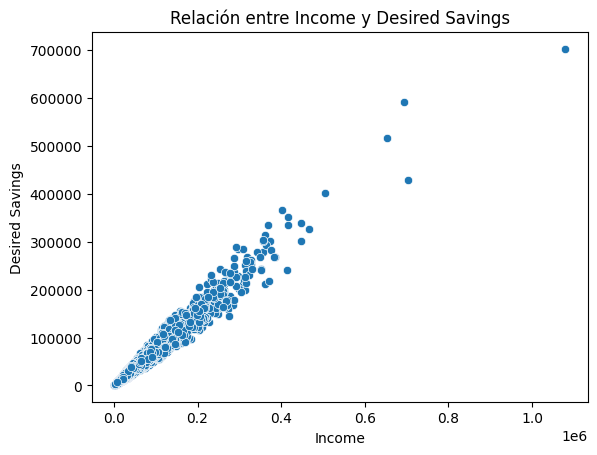

In [16]:
# Gráfico de dispersión
sns.scatterplot(data=df, x='Income', y='Total_Expenses')
plt.title('Relación entre Income y Desired Savings')
plt.xlabel('Income')
plt.ylabel('Desired Savings')
plt.show()

<Axes: xlabel='Total_Expenses', ylabel='Count'>

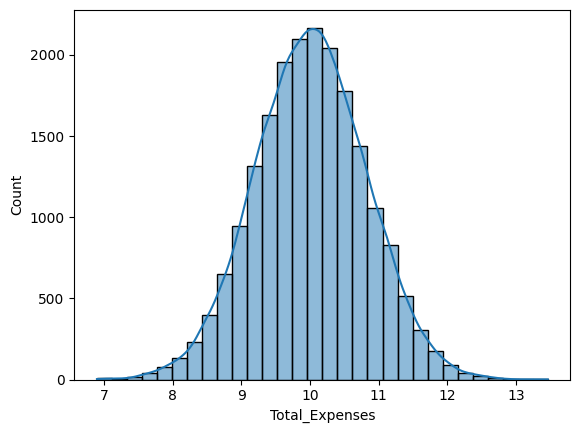

In [17]:
sns.histplot(np.log1p(df['Total_Expenses']), bins=30, kde=True)

In [18]:
scaler = StandardScaler()
selected_columns = ['Income','Age', 'Disposable_Income', 'Rent', 'Groceries']  # Ejemplo
scaled_data = scaler.fit_transform(df[selected_columns])


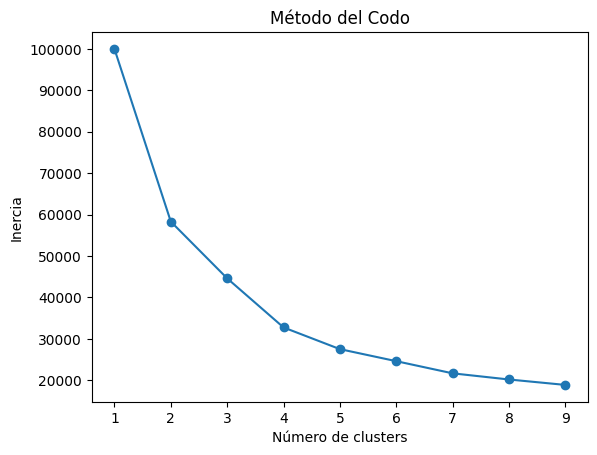

In [19]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


In [20]:
# Seleccionar la columna Total_Expenses
total_expenses = df[['Total_Expenses']]

# Escalar los datos
scaler = StandardScaler()
total_expenses_scaled = scaler.fit_transform(total_expenses)

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Expense_Cluster'] = kmeans.fit_predict(total_expenses_scaled)

# Asignar nombres a los clusters
df['Expense_Cluster'] = df['Expense_Cluster'].map({0: 'Gasto Bajo', 1: 'Gasto Medio', 2: 'Gasto Alto'})

# Mostrar los primeros registros con el nuevo cluster
df[['Total_Expenses', 'Expense_Cluster']].head()

,Total_Expenses,Expense_Cluster
0,33371.61,Gasto Bajo
1,17181.77,Gasto Bajo
2,36476.16,Gasto Bajo
3,69837.65,Gasto Medio
4,18609.61,Gasto Bajo


In [21]:
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,Expense_Cluster
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74,33371.61,Gasto Bajo
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39,17181.77,Gasto Bajo
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54,36476.16,Gasto Bajo
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04,69837.65,Gasto Medio
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56,18609.61,Gasto Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.47,51,4,Self_Employed,Tier_1,12274.04,7703.85,1646.80,5477.40,2084.23,...,597.03,287.32,347.66,145.84,212.83,44.90,98.77,190.59,39750.14,Gasto Medio
19996,90295.77,21,1,Student,Tier_2,18059.15,0.00,2770.59,13118.22,4633.11,...,3854.82,359.60,911.27,424.06,1555.55,129.66,239.45,351.44,59570.59,Gasto Medio
19997,40604.57,30,1,Professional,Tier_2,8120.91,8089.61,1548.56,6018.28,2493.56,...,1385.51,379.93,138.21,297.70,824.57,57.89,72.73,122.57,38336.66,Gasto Bajo
19998,118157.82,27,2,Professional,Tier_1,35447.35,12345.91,4735.67,16392.44,8248.24,...,3217.77,2265.87,726.25,273.91,859.23,98.96,92.19,569.81,107554.13,Gasto Alto


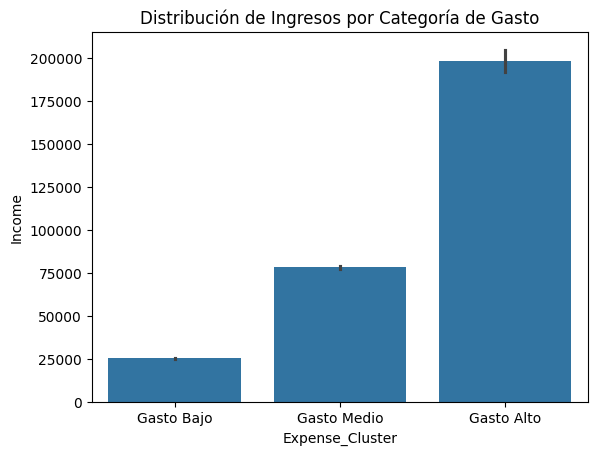

In [22]:
sns.barplot(x='Expense_Cluster', y='Income', data=df)
plt.title('Distribución de Ingresos por Categoría de Gasto')
plt.show()

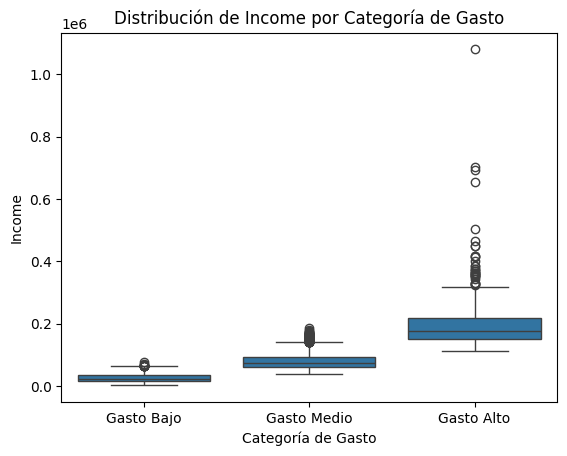

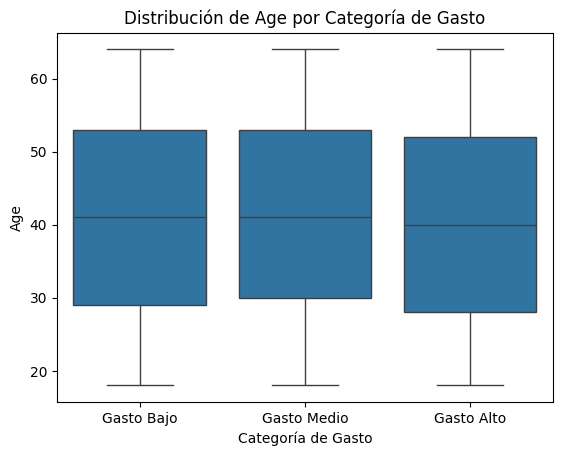

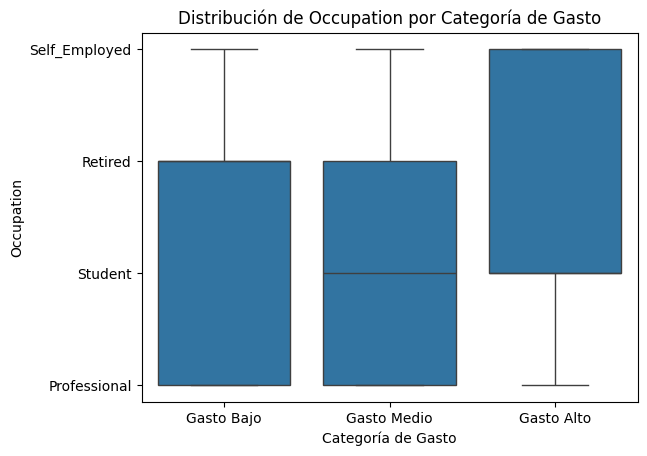

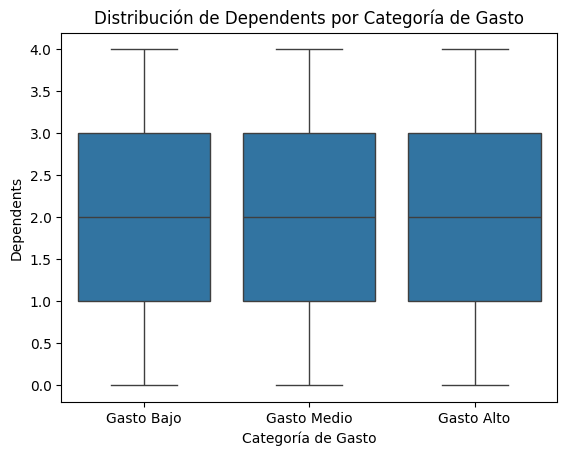

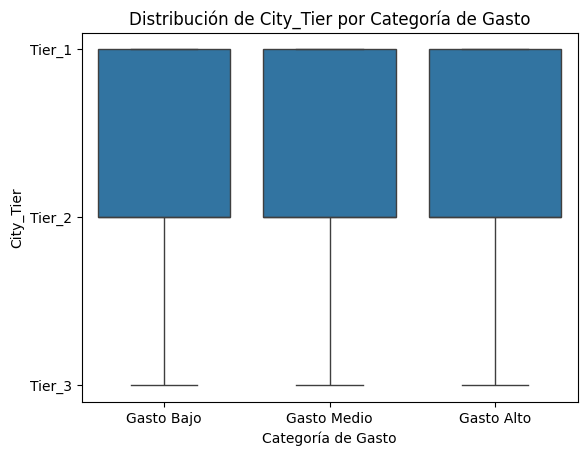

In [23]:
for col in['Income','Age','Occupation','Dependents','City_Tier']:
    sns.boxplot(x='Expense_Cluster', y=col, data=df)
    plt.xlabel('Categoría de Gasto')
    plt.ylabel(col)
    plt.title(f'Distribución de {col} por Categoría de Gasto')
    plt.show()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_264\2216529234.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




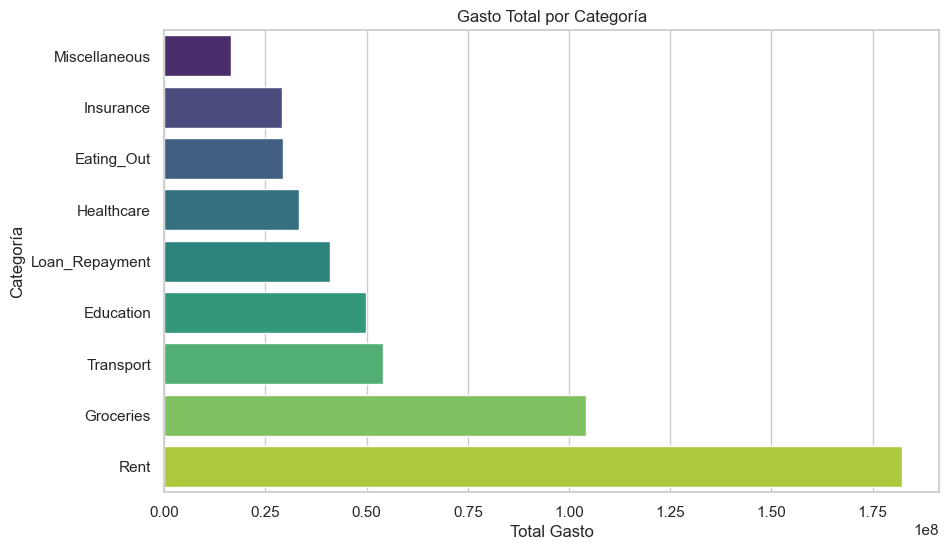

In [39]:
# 2. Gasto total por categoría
plt.figure(figsize=(10, 6))
categorias = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 
              'Transport', 'Eating_Out', 'Healthcare', 'Education', 'Miscellaneous']

gasto_total = df[categorias].sum().sort_values()
sns.barplot(x=gasto_total.values, y=gasto_total.index, palette="viridis")
plt.title("Gasto Total por Categoría")
plt.xlabel("Total Gasto")
plt.ylabel("Categoría")
plt.show()

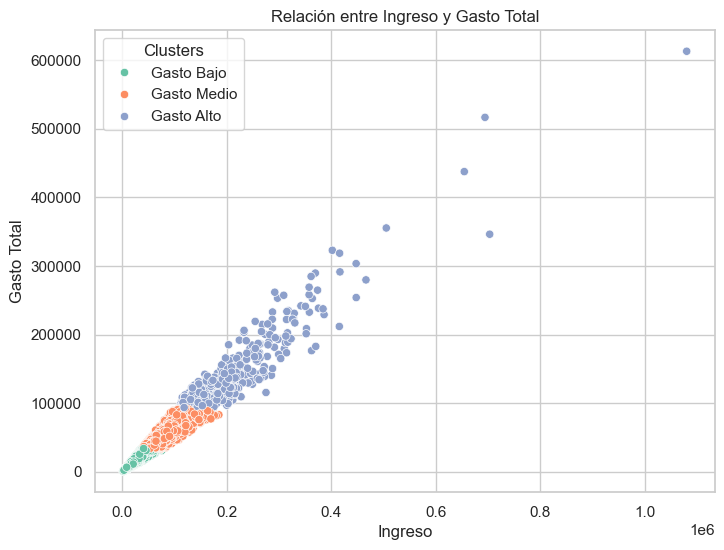

In [41]:
# Configuración estética para Seaborn
sns.set_theme(style="whitegrid")

# 3. Relación entre ingresos y gasto total
df["Gasto_Total"] = df[categorias].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Income", y="Gasto_Total", hue="Expense_Cluster", palette="Set2")
plt.title("Relación entre Ingreso y Gasto Total")
plt.xlabel("Ingreso")
plt.ylabel("Gasto Total")
plt.legend(title="Clusters")
plt.show()

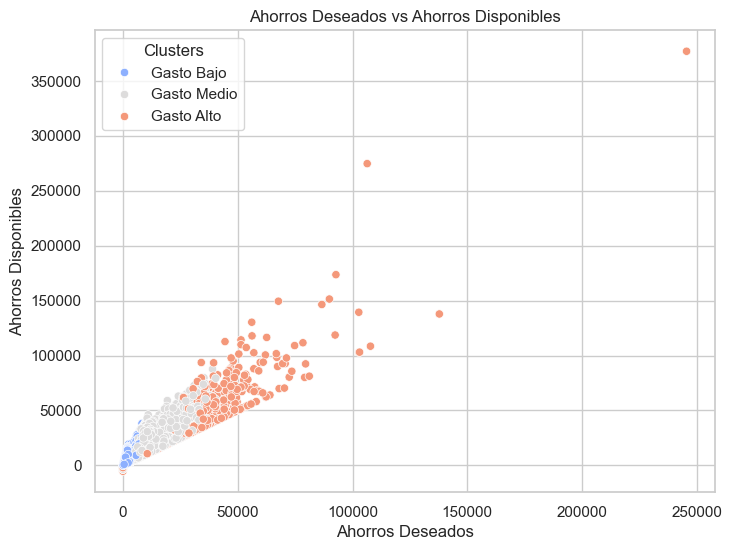

In [43]:
# Configuración estética para Seaborn
sns.set_theme(style="whitegrid")

# 4. Ahorros deseados vs ahorros disponibles
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Desired_Savings", y="Disposable_Income", hue="Expense_Cluster", palette="coolwarm")
plt.title("Ahorros Deseados vs Ahorros Disponibles")
plt.xlabel("Ahorros Deseados")
plt.ylabel("Ahorros Disponibles")
plt.legend(title="Clusters")
plt.show()